># Bank Marketing Data Set Analysis Using SVM , Logistic Regression , Random Forest and Naive Bayes & Analysing Their Performance With ROC-AUC Curve.
>>##### By - Saif Ali Ahmad
Discription about dataset - The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

>URL for data set - https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Importing the Data Set

In [ ]:
# Importing the important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\saif\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\saif\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
# Loading The Dataset
doc = pd.read_csv('bank-additional-full.csv',sep=';')
# Printing the dataset shape
print('Dataset Shape - ', doc.shape)

Dataset Shape -  (41188, 21)


In [ ]:
# Looking at first 10 values of dataset
doc.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Printing information about Dataset using info() cammand
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [ ]:
# Finding if there is null value in Data Set
doc.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [ ]:
# Columns of Data Set
doc.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# Unique Values and ther frequency in 'education' column
doc.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
# Unique Values and ther frequency in 'default' column
doc.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

## Data Preprocessing Part
>First we will Create Variables X & y , then we will create two more variables X_categorical & X_continuous out of X containning columns with categorical & continuous data in X respectively.

In [ ]:
# Creating Variable X by dropping 'y' i.e the column to predict
X = doc.drop('y',axis=1)
# Creating Variable y with column 'y' i.e the column to predict
y = doc['y'].values

In [ ]:
# Printing first five Columns of X
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
y

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [ ]:
# creating x_categorical with columns containing only categorical variables
X_categorical = X.drop(labels=['age','duration', 'campaign', 'pdays',
                               'previous', 'emp.var.rate', 'cons.price.idx',
                               'cons.conf.idx', 'euribor3m', 'nr.employed'], axis =1)  

X_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [ ]:
# Creating x_categorical with columns containing only categorical variables
X_continuous = X.loc[:, ['age','duration', 'campaign', 'pdays',
                   'previous', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed'] ]

X_continuous.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
# Creating Dummy Variables for X_categorical
X_categorical = pd.get_dummies(X_categorical , drop_first=True)


X_categorical.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
# Creating Dummy Variables for variable y
label_y = pd.get_dummies(y,drop_first=True)

label_y.head()

,yes
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Converting y into numpy array of shape (41188,)
label_y = label_y.values.reshape(41188,)
print('Label_y shape  ---  ',label_y.shape)
label_y

Label_y shape  ---   (41188,)


array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

## Standardizing The Categorical Data
>First we will scale the continuous data of X_continuous with sklearns StandardScalar and save the result in X_scaled variable. then we will concatenate X_scaled with X_categorical to create variable feature_X containing features to be feed in our machine learning model.

In [ ]:
# importing StandardScalar from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# scaling the X_continuous 
X_Scaled = sc.fit_transform(X_continuous)
# concatenating X_scaled & X_categorical 
feature_X = np.concatenate((X_Scaled , X_categorical.values), axis = 1)

print('Feature column Shape =  ',feature_X.shape)
feature_X

Feature column Shape =   (41188, 53)


array([[ 1.53303429,  0.01047142, -0.56592197, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.62899323, -0.42150051, -0.56592197, ...,  0.        ,
         1.        ,  0.        ],
       [-0.29018564, -0.12451981, -0.56592197, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.38152696,  0.70856893, -0.56592197, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.26029527, -0.07438021,  0.15610492, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Shuffling the data using sklearns Shuffle
# And the splitting the data using train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

feature_X , label_y = shuffle(feature_X , label_y , random_state = 1)
X_train , X_test , y_train , y_test = train_test_split(feature_X , label_y , test_size = 0.2 , random_state = 0)

In [ ]:
# Printin Shape of Test and Train Data
print('X_train Shape ---  ',X_train.shape)
print('y_train Shape ---  ',y_train.shape)

print('X_test Shape  ---  ',X_test.shape)
print('y_test Shape  ---  ',y_test.shape)

X_train Shape ---   (32950, 53)
y_train Shape ---   (32950,)
X_test Shape  ---   (8238, 53)
y_test Shape  ---   (8238,)


# Applying SVM , Logistic Regression , Random Forest and Naive Bayes for Classification.

>## SVM Model For Classification

In [ ]:
# Applying SVC model with Gaussian Kernel on X_train , y_train
from sklearn.svm import SVC
svc_classifier = SVC(kernel= 'rbf' , C=1 ,probability = True)
svc_classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Testing model performance with Confussion Matrix and Classification Report 
from sklearn.metrics import confusion_matrix , classification_report

svc_pred = svc_classifier.predict(X_test)

svc_cm = confusion_matrix(y_test,svc_pred)
print('Confusion  Matrix :- \n', svc_cm)
print('\n Accuracy = ',(svc_cm[0][0] + svc_cm[1][1])/X_test.shape[0]*100,'%')
svc_cr = classification_report(y_test,svc_pred)
print('\n Classification Report :- \n ',svc_cr)

Confusion  Matrix :- 
 [[7158  128]
 [ 605  347]]

 Accuracy =  91.10220927409566 %

 Classification Report :- 
               precision    recall  f1-score   support

          0       0.92      0.98      0.95      7286
          1       0.73      0.36      0.49       952

avg / total       0.90      0.91      0.90      8238



In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
SVC_accuracies = cross_val_score(estimator = svc_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies = ',SVC_accuracies)
print('Mean Accuracy of SVM = ',SVC_accuracies.mean()*100,'%')
print('Standard Deviation =',SVC_accuracies.std())

Accuracies =  [0.91140777 0.90412621 0.91016692 0.907739   0.90804249 0.91229135
 0.90227618 0.90986343 0.9058895  0.9058895 ]
Mean Accuracy of SVM =  90.77692335360098 %
Standard Deviation = 0.003072632524062179


># Logistic Regression Model

In [ ]:
# Applying Logistic Regression model on X_train , y_train
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(penalty='l1',C=0.9)
log_classifier.fit(X_train,y_train)

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# Testing model performance with Confussion Matrix and Classification Report 
from sklearn.metrics import confusion_matrix , classification_report

log_pred = log_classifier.predict(X_test)

log_cm = confusion_matrix(y_test,log_pred)
print('Confusion  Matrix :- \n', log_cm)
print('\n Accuracy = ',(log_cm[0][0] + log_cm[1][1])/X_test.shape[0]*100,'%')
log_cr = classification_report(y_test,log_pred)
print('\n Classification Report :- \n ',log_cr)

Confusion  Matrix :- 
 [[7096  190]
 [ 536  416]]

 Accuracy =  91.18718135469774 %

 Classification Report :- 
               precision    recall  f1-score   support

          0       0.93      0.97      0.95      7286
          1       0.69      0.44      0.53       952

avg / total       0.90      0.91      0.90      8238



In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
log_accuracies = cross_val_score(estimator = log_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies = ',log_accuracies)
print('Mean Accuracy of Logistic Regression = ',log_accuracies.mean()*100,'%')
print('Standard Deviation =',log_accuracies.std())

Accuracies =  [0.91595874 0.9065534  0.91259484 0.91320182 0.91047041 0.91138088
 0.90440061 0.91289833 0.90801457 0.91165756]
Mean Accuracy of Logistic Regression =  91.07131156295972 %
Standard Deviation = 0.0032841468326297134


># Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 300 , criterion = 'gini')
rf_classifier.fit(X_train,y_train)

C:\Users\saif\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
# Testing model performance with Confussion Matrix and Classification Report 
from sklearn.metrics import confusion_matrix , classification_report

rf_pred = rf_classifier.predict(X_test)

rf_cm = confusion_matrix(y_test,rf_pred)
print('Confusion  Matrix :- \n', rf_cm)
print('\n Accuracy = ',(rf_cm[0][0] + rf_cm[1][1])/X_test.shape[0]*100,'%')
rf_cr = classification_report(y_test,rf_pred)
print('\n Classification Report :- \n ',rf_cr)

Confusion  Matrix :- 
 [[7028  258]
 [ 473  479]]

 Accuracy =  91.12648701141055 %

 Classification Report :- 
               precision    recall  f1-score   support

          0       0.94      0.96      0.95      7286
          1       0.65      0.50      0.57       952

avg / total       0.90      0.91      0.91      8238



In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
rf_accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies = ',rf_accuracies)
print('Mean Accuracy of Random Forest Classifier = ',rf_accuracies.mean()*100,'%')
print('Standard Deviation =',rf_accuracies.std())

Accuracies =  [0.92050971 0.90867718 0.9168437  0.91593323 0.91198786 0.91350531
 0.91168437 0.91654021 0.91074681 0.91924712]
Mean Accuracy of Random Forest Classifier =  91.45675510481078 %
Standard Deviation = 0.003654247679623487


># Naive Bayes Model

In [ ]:
# Applying Naive Bayes model on X_train , y_train
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [ ]:
# Testing model performance with Confussion Matrix and Classification Report 
from sklearn.metrics import confusion_matrix , classification_report

nb_pred = nb_classifier.predict(X_test)

nb_cm = confusion_matrix(y_test,nb_pred)
print('Confusion Matrix :- \n', nb_cm)
print('\n Accuracy = ',(nb_cm[0][0] + nb_cm[1][1])/X_test.shape[0]*100,'%')
nb_cr = classification_report(y_test,nb_pred)
print('\n Classification Report :- \n ',nb_cr)

Confusion Matrix :- 
 [[6256 1030]
 [ 373  579]]

 Accuracy =  82.9691672736101 %

 Classification Report :- 
               precision    recall  f1-score   support

          0       0.94      0.86      0.90      7286
          1       0.36      0.61      0.45       952

avg / total       0.88      0.83      0.85      8238



In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
nb_accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
print('Accuracies = ',nb_accuracies)
print('Mean Accuracy of  Naive Bayes = ',nb_accuracies.mean()*100,'%')
print('Standard Deviation =',nb_accuracies.std())

Accuracies =  [0.84739078 0.84496359 0.83884674 0.84218513 0.84218513 0.82185129
 0.83034901 0.84097117 0.83879781 0.84031573]
Mean Accuracy of  Naive Bayes =  83.87856376076127 %
Standard Deviation = 0.0070738884583537815


# Plotting ROC-AUC curve for Different Classification Model
>ROC curve of different models is plotted and AUC is calculated and displayed in the graph for evaluation of performance of the models.

In [ ]:
# Calculating the predicted value in terms of Probability
y_svc_prob = svc_classifier.predict_proba(X_test)[::,1]
y_log_prob = log_classifier.predict_proba(X_test)[::,1]
y_nb_prob  = nb_classifier.predict_proba(X_test)[::,1]
y_rf_prob  = rf_classifier.predict_proba(X_test)[::,1]

# Printing the shape of predicted probable values
print('y_svc_prob shape : ',y_svc_prob.shape)
print('y_log_prob shape : ',y_log_prob.shape)
print('y_nb_prob shape  : ',y_nb_prob.shape)
print('y_rf_prob shape  : ',y_rf_prob.shape)

y_svc_prob shape :  (8238,)
y_log_prob shape :  (8238,)
y_nb_prob shape  :  (8238,)
y_rf_prob shape  :  (8238,)


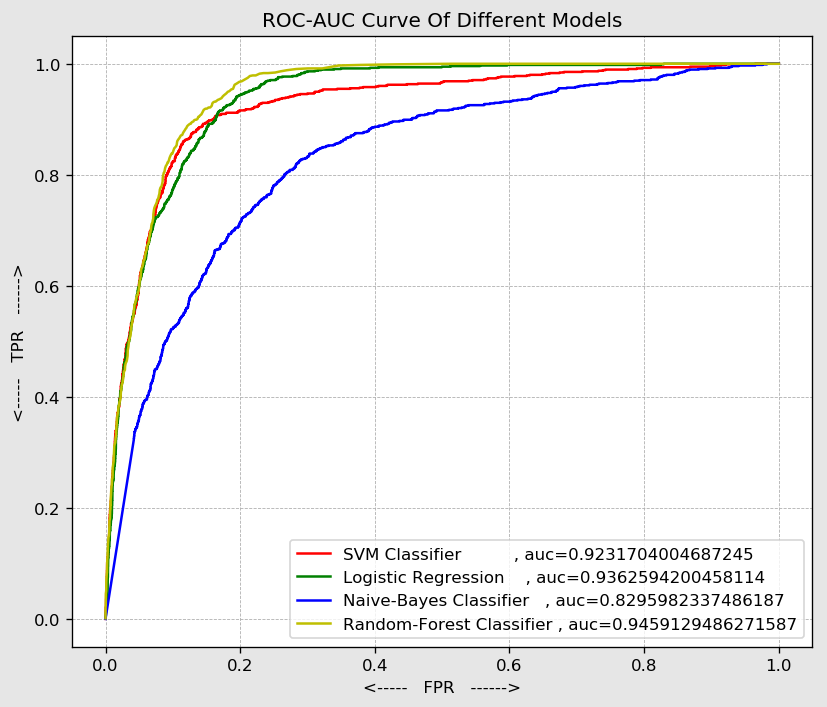

In [ ]:
from sklearn import metrics

# Calculating FPR & TPR
svc_fpr,svc_tpr,_ = metrics.roc_curve(y_test,y_svc_prob)
log_fpr,log_tpr,_ = metrics.roc_curve(y_test,y_log_prob)
nb_fpr,nb_tpr,_   = metrics.roc_curve(y_test,y_nb_prob)
rf_fpr,rf_tpr,_   = metrics.roc_curve(y_test,y_rf_prob)

# Calculating AUC of different models
svc_auc = metrics.roc_auc_score(y_test,y_svc_prob)
log_auc = metrics.roc_auc_score(y_test,y_log_prob)
nb_auc  = metrics.roc_auc_score(y_test,y_nb_prob)
rf_auc  = metrics.roc_auc_score(y_test,y_rf_prob)

# Plotting the ROC curve and displaying AUC 
fig , axes = plt.subplots(nrows = 1 , ncols = 1,figsize = (7,6) , dpi = 120,facecolor='0.9')
plt.plot(svc_fpr,svc_tpr,'r',label='SVM Classifier          , auc='+str(svc_auc))
axes.plot(log_fpr,log_tpr,'g',label='Logistic Regression    , auc='+str(log_auc))
axes.plot(nb_fpr,nb_tpr,'b',label='Naive-Bayes Classifier   , auc='+str(nb_auc))
axes.plot(rf_fpr,rf_tpr,'y',label='Random-Forest Classifier , auc='+str(rf_auc))

axes.set_title('ROC-AUC Curve Of Different Models')
axes.set_xlabel('<-----   FPR   ------>')
axes.set_ylabel('<-----   TPR   ------>')
axes.grid(linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.legend()
plt.show()

# Conclusion - 

>>### Accuracies & ROC-AUC score of Different Machine Learing Models after applying K - Fold Cross Validation and plotting ROC curve are -

>><br>
Mean Accuracy of SVM                      = 90.77692335360098 % <br> 
AUC of SVM                                = 0.9231704004687245 <br>
<br>
Mean Accuracy of Logistic Regression      = 91.06827574025176 % <br>
AUC of Logistic Regression                = 0.9362594200458114 <br>
<br>
Mean Accuracy of Random Forest Classifier = 91.46283135526072 % <br>
AUC of Random Forest Classifier           = 0.9459129486271587 <br>
<br>
Mean Accuracy of  Naive Bayes             = 83.87856376076127 % <br>
AUC of Naive Bayes                        = 0.8295982337486187 <br>